In [152]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [153]:
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)
df_by_genres = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_genres.csv', index_col = 0)
df_by_year = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_year.csv', index_col = 0)
df_w_genres = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_w_genres.csv', index_col = 0)

In [154]:
df_main

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [155]:
df_main['artists'] = df_main['artists'].apply(lambda x: x[1:-1].split(', '))
df_main = df_main.explode('artists')
df_main['artists'] = df_main['artists'].apply(lambda x: x.strip("'"))
# df_main_important_info =  df_main.loc[:,['artists','name','popularity','year']]
df_main

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [168]:
df = df_main.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'name']]
df = df.head(100)

In [169]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
x = df.loc[:, features].values

In [170]:
y = df.loc[:,['name']].values

In [171]:
x = StandardScaler().fit_transform(x)

In [172]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.347624,0.951118,0.374926,-0.015388,1.186432,0.073281,0.981417,-0.355097,0.895825,1.166862
1,0.337859,-0.616293,-1.241288,0.853277,0.557025,-0.802719,-1.365111,-0.374194,-0.470142,-1.191850
2,0.337859,-0.616293,-1.241288,0.853277,0.557025,-0.802719,-1.365111,-0.374194,-0.470142,-1.191850
3,-3.470379,1.146449,0.597545,-1.462306,-0.387085,-0.301980,-0.116148,3.457373,0.448699,1.506076
4,0.347624,1.298902,-0.203883,0.817297,-1.645900,-0.395795,0.643773,-0.172807,0.481406,0.968708


In [173]:
pca = PCA(n_components = 2)

In [174]:
principalComponents = pca.fit_transform(x)

In [175]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [176]:
principalDf.head(5)
principalDf.shape

(100, 2)

In [177]:
df[['name']].shape

(100, 1)

In [178]:
finalDf = pd.concat([principalDf, df[['name']]], axis = 1)
finalDf.head(5)

ValueError: Shape of passed values is (210, 3), indices imply (136, 3)

Text(0.5, 1.0, '2 component PCA')

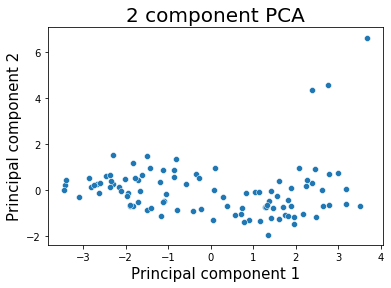

In [100]:
ax = sns.scatterplot(x = 'principal component 1', y = 'principal component 2', data = finalDf)
ax.set_xlabel('Principal component 1', fontsize = 15)
ax.set_ylabel('Principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

In [125]:
# PCA for top 10 artists I found in EDA
df_top10 = df_main[(df_main['artists'] == 'The Beatles') | 
                   (df_main['artists'] == 'Drake') |
                   (df_main['artists'] == 'Frank Sinatra') |
                   (df_main['artists'] == 'The Rolling Stones') |
                   (df_main['artists'] == 'Eminem') |
                   (df_main['artists'] == 'Bob Dylan') |
                   (df_main['artists'] == 'Elvis Presley') | 
                   (df_main['artists'] == 'Johnny Cash') | 
                   (df_main['artists'] == 'The Beach Boys') | 
                   (df_main['artists'] == 'Led Zeppelin')]
df_top10
df2 = df_top10.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'artists']]
df2.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,artists
1755,0.121,0.617,0.587,0.001560,10,0.209,-13.291,0.0315,105.613,0.735,Johnny Cash
1774,0.568,0.729,0.546,0.000000,1,0.143,-13.060,0.0538,106.291,0.884,Johnny Cash
1823,0.669,0.696,0.392,0.000380,10,0.113,-12.971,0.0306,111.367,0.839,Johnny Cash
1833,0.543,0.820,0.365,0.000102,10,0.102,-14.536,0.0442,102.355,0.779,Johnny Cash
1852,0.642,0.777,0.545,0.000257,5,0.118,-13.168,0.0909,104.567,0.857,Johnny Cash


In [128]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
x = df2.loc[:, features].values

In [130]:
y = df2.loc[:,['artists']].values

In [131]:
x = StandardScaler().fit_transform(x)

In [132]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,-1.129424,0.556959,0.315084,-0.321922,1.357625,-0.148276,-0.668276,-0.479284,-0.425230,0.690394
1,0.267226,1.227455,0.148285,-0.330089,-1.189568,-0.449003,-0.611823,-0.277805,-0.402913,1.268322
2,0.582800,1.029898,-0.478228,-0.328100,1.357625,-0.585697,-0.590073,-0.487415,-0.235833,1.093780
3,0.189114,1.772233,-0.588071,-0.329555,1.357625,-0.635819,-0.972537,-0.364541,-0.532470,0.861057
4,0.498439,1.514810,0.144217,-0.328743,-0.057482,-0.562915,-0.638217,0.057390,-0.459660,1.163597


In [133]:
pca = PCA(n_components = 2)

In [134]:
principalComponents = pca.fit_transform(x)

In [135]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [136]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.569288,-0.741814
1,-0.273327,-1.644965
2,0.272518,-1.717665
3,0.234687,-2.105106
4,-0.282049,-1.857270


In [137]:
df2[['artists']].head()

,artists
1755,Johnny Cash
1774,Johnny Cash
1823,Johnny Cash
1833,Johnny Cash
1852,Johnny Cash


In [138]:
finalDf = pd.concat([principalDf, df2[['artists']]], axis = 1)
finalDf.head(5)

ValueError: Shape of passed values is (9354, 3), indices imply (9344, 3)